## 1 Author
### Student Name: Mohit yadav
### Student ID: 210491443

## 2 Problem formulation

**Using the MLEnd Hums and Whistles dataset, build a machine learning pipeline that takes as an input a Potter or a StarWars audio segment and predicts its song label (either Harry or StarWars).**

## 3 Machine Learning pipeline

My machine learning Pipeline contains **Input as mfccs as a feature** and **Output as Label** ie Song name.

1.Divided the data into Train,test,validation

                V
                
2.USing RandomForestClassifier trained the data

                V
                
3.Predicted the Data and assessed using Classification Matrix.

## 4 Transformation stage

**Mfccs as a Feature**

In [3]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

**Appending the Data**

In [4]:
def get_data(path):
    features = []
    for filename in os.listdir(path):
        if filename.endswith(".wav"):
            labels = filename
            data = features_extractor(path+"/"+filename)
            features.append([data,labels])
    return features

**Appending mfccs as feature with harry**

In [6]:
#arranging files in Df and its features accordingly for Harry Potter 
Harry = get_data("C:/Users/04moh/OneDrive - Queen Mary, University of London/ML mini project/data/Potter_1")
Harry_2 = get_data("C:/Users/04moh/OneDrive - Queen Mary, University of London/ML mini project/data/Potter_2")
#Appending a label of Harry with all the Data
Harry = [["Harry"]+list(HP) for HP in Harry]
Harry_2 = [["Harry"]+list(HP) for HP in Harry_2]
Harry = [*Harry,*Harry_2]

**Appending mfccs as feature with Starwars**

In [7]:
#arranging files in Df and its features accordingly for StarWars
StarWars = get_data("C:/Users/04moh/OneDrive - Queen Mary, University of London/ML mini project/data/StarWars_1")
StarWars_2 = get_data("C:/Users/04moh/OneDrive - Queen Mary, University of London/ML mini project/data/StarWars_2")
#Appending a label of StarWars with all the Data
StarWars = [["StarWars"]+list(SW) for SW in StarWars]
StarWars_2 = [["StarWars"]+list(SW) for SW in StarWars_2]
StarWars = [*StarWars,*StarWars_2]

In [8]:
Feature_list=[*Harry,*StarWars]


In [9]:
print(Feature_list)

[['Harry', array([-5.01296570e+02,  1.20112595e+02, -3.18654671e+01,  4.77863350e+01,
        3.54243927e+01, -1.29901514e+01,  1.78118000e+01,  9.81521606e+00,
       -1.38723660e+01,  1.31378279e+01, -1.56704593e+00, -1.46368818e+01,
        7.24987078e+00, -2.68367529e+00, -5.26682234e+00,  9.15080070e+00,
       -5.77292252e+00, -9.36443138e+00,  3.06154871e+00,  2.14254761e+00,
       -1.55211270e+00, -4.91118580e-01,  2.98521328e+00,  2.30196810e+00,
       -4.69384193e+00, -3.66076612e+00,  4.10617161e+00, -1.21795332e+00,
       -2.48609734e+00,  7.04229450e+00,  3.47015095e+00, -3.06442142e+00,
        1.85096681e+00,  1.31222951e+00, -4.13965374e-01,  1.42370391e+00,
       -6.82677448e-01, -2.75284499e-01,  7.08218813e-01,  2.58828664e+00],
      dtype=float32), 'S100_hum_1_Potter.wav'], ['Harry', array([-4.90344391e+02,  1.05943596e+02, -2.36954441e+01,  4.13498726e+01,
        3.66524048e+01, -6.27355337e+00,  2.30036163e+01,  1.12779655e+01,
       -9.90419102e+00,  1.096

## 5 Modelling

**Using RandomforestClassifier as Model**

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10000)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

## 6 Methodology

**Dividing the data into Training,Testing and Validating**

In [47]:
from sklearn.model_selection import train_test_split
X_data,X_test,y_data,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_val,y_train,y_val=train_test_split(X_data,y_data,test_size=0.2,random_state=0)

**Classification report with f1 score,precision,recall,support and accuracy**

In [39]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

       Harry     0.6522    0.6338    0.6429        71
    StarWars     0.5873    0.6066    0.5968        61

    accuracy                         0.6212       132
   macro avg     0.6197    0.6202    0.6198       132
weighted avg     0.6222    0.6212    0.6216       132



**Confusion Matrix as TP = 44,FP=27,FN=32,TN=29**

In [22]:
confusion_matrix(y_val,y_xg)

array([[44, 27],
       [32, 29]], dtype=int64)

**Predicting the Test data**

In [26]:
y_pred_test = model.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred_test, digits=4))

              precision    recall  f1-score   support

       Harry     0.6049    0.6282    0.6164        78
    StarWars     0.6548    0.6322    0.6433        87

    accuracy                         0.6303       165
   macro avg     0.6299    0.6302    0.6298       165
weighted avg     0.6312    0.6303    0.6305       165



## 7 Dataset

In [40]:
feature_df = pd.DataFrame(Feature_list , columns =["label","feature","File_name"])

In [41]:
feature_df.tail()

,label,feature,File_name
819,StarWars,"[-349.0132, 99.065, -61.942295, 28.774992, 25....",S219_hum_4_StarWars.wav
820,StarWars,"[-490.38, 117.54083, 8.842858, 30.32091, 16.27...",S221_hum_1_StartWars.wav
821,StarWars,"[-488.86118, 109.47816, 26.915993, 38.339073, ...",S221_hum_2_StarWars.wav
822,StarWars,"[-555.67413, 65.14191, -9.530598, 0.7997725, -...",S222_hum_2_StarWars.wav
823,StarWars,"[-526.9267, 34.65533, -38.58538, -36.339096, 5...",S222_whistle_2_StarWars.wav


In [42]:
X=np.array(feature_df['feature'].tolist())
y=np.array(feature_df['label'].tolist())

**Scaling Down the data using MinMax Scaler**

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fitting = scaler.fit(X,y)
X = scaler.transform(X)


**Visualising the data with the label and features by matplotlib**

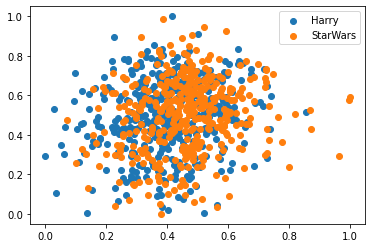

In [44]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
counter = Counter(y)
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## 8 Results

In [50]:
#example 
example = feature_df['feature'].iloc[10]
y_prediction = clf.predict([example])

In [52]:
print(y_prediction[0])

StarWars


## 9 Conclusions

**Improvements: Can achieve better accuracy of the model with more features**